In [1]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Repaso Algoritmos de Clasificación:

## Función Discriminante

Mientras que en regresión lineal teniamos una (o muchas) variables continuas $t(\vec{x})$, aquí sabemos que cada $\vec{x}$ pertenece a una (única) clase $C_{k}$. El objetivo es entonces, teniendo un set de entrenamiento de inputs y etiquetas $(\vec{x}_{i},t_{i})$, poder asignar una clase $C_{k}$ a un nuevo input $\vec{x}$. Usualmente trabajaremos con la asignación $t_{k}=(... 1,..)^{T}$. Es decir, un vector de ceros excepto en el lugar $k$, donde hay un 1.

Así como para regresión lineal podíamos tratar de obtener directamente la función discriminante, aquí podemos asignar un $y_{k,i}$ a cada $\vec{x}_{i}$:

$y_{k,i} = f(w_{0,k}+\vec{w}^{T}_{k}\vec{x}_{i})$

Donde $k$ es la clase, $\vec{w}_{k},w_{0,k}$ son los coeficientes a estimar por cada clase y $f$ es la función de activación, que constituye la primera diferencia con el enfoque de regresión lineal. Esta función de activación permite capturar mejor no linearidades y devolver un número en el intervalo $[0,1)$ para poder establecer un criterio de selección de clase. Cada criterio de selección dará lugar a _fronteras de decisión_. Si un punto cae en una frontera de decisión, se debe establecer un criterio de asignación de clase (usualmente se tira un número al azar).

La estimación de los coeficientes $\text{W}_{ik}=w_{i,k}$ puede hacerse de distintas maneras. Aquí vamos a ver tres criterios: **cuadrados mínimos**, **discriminante linear de Fisher y el perceptron**.

### Cuadrados Mínimos

Para el primer método, establecemos la asignación de la clase k-esima cuando $y_{k}>y_{j}$ para todo $j$ distinto de $k$. Con esta asignación de clase, aparecen las _fronteras de decisión_ donde $y_{k}=y_{j}$ para dos clases $kj$. Luego, minimizamos la función de error de cuadrados mínimos y obtenemos la expresión cerrada.

$\text{W}=(\text{X}^{T}\text{X})^{-1}\text{X}^{T}\text{T}$

Donde $\text{W}$ es la matriz cuya k-esima columna son los coeficientes $w_0,w_1,..,w_{D}$ de la clase k-esima, $\text{X}$ es la matriz cuya i-esima fila consiste en los coeficientes $1,x_{1},...,x_{D}$ para la medición i-esima, $\text{T}$ es la matriz de clases, donde la fila i-esima consistirá en ceros con excepción del lugar corresponde a la clase de la medición i-esima.

En particular, para el caso de dos clases, puede utilizarse únicamente un $y$ y asignar la clase 1 si $y \geq 0$ y la clase 2 si $y < 0$.

### Discriminante Linear de Fisher

Vamos a utilizar el metodo de scikit-learn. El Bishop lo introduce de manera distinta.

Si se quiere utilizar el discriminante linear de Fisher para dos clases, se define un $y=w_{0}+\vec{w}^{T}\vec{x}$ y se obtiene $\vec{w}$ como:

$\text{S}^{-1}_{\text{W}}(\vec{\mu}_{2}-\vec{\mu}_{1})$

Donde $\vec{\mu}_{i}$ es la media de los $\vec{x}$ pertenencientes a la clase i-esima y $\text{S}_{w}$ es la varianza intra clase definida por

$\text{S}_{\text{W}}=\sum_{i \in \mathcal{C}_{1}}(\vec{x}_{i}-\vec{\mu}_{1})(\vec{x}_{i}-\vec{\mu}_{1})^{T}+\sum_{i \in \mathcal{C}_{2}}(\vec{x}_{i}-\vec{\mu}_{2})(\vec{x}_{i}-\vec{\mu}_{2})^{T}$

Una vez obtenido $\vec{w}$, se puede obtener la _frontera de decisión_ como la recta perpendicular a $\vec{w}$.

Queda encontrar la distancia de la recta de decision al origen. Esto es decir $w_{0}$. Si la frontera de decision se pone en $y=0$

$w_{0}=-\frac{1}{2}\vec{\mu}_{2}^{T}\text{S}^{-1}_{\text{W}}\vec{\mu}_{2}+\frac{1}{2}\vec{\mu}_{1}^{T}\text{S}^{-1}_{\text{W}}\vec{\mu}_{1}$

Y si la frontera de decision se pone en algun otro $y_{0}$, se redefine el sesgo como $w'_{0}=w_{0}-y_{0}$.

### Perceptrón

El perceptron, al que ya vamos a volver, es otra forma de obtener una función de discriminación. Allí, utilizamos una función de activación $f(a)$ tal que $f(a) = 1.0$ si $a \geq 0$ y $f(a) = -1.0$ si $a < 0$.

Además, introducimos nuevamente funciones $\phi_{j}$, usualmente con $\phi_{0}=1.0$ de manera tal que 

$y(\vec{x})=f(\vec{w}^{T}\vec{\phi}(\vec{x}))$

Para este algoritmo, tomamos las etiquetas $t = 1$ para $\mathcal{C}_{1}$ y $t = -1$ para $\mathcal{C}_{2}$.

Para el perceptron puede derivarse un algoritmo secuencial de optimización de los $\vec{w}$. Para una medición $\vec{x}_{n}$, si el perceptron clasifica adecuadamente se prosigue pero si se clasifica erroneamente, se actualiza $\vec{w}$ de la siguiente manera:

$\vec{w}^{\tau+1} = \vec{w}^{\tau}+\vec{\phi}(\vec{x}_{n})t_{n}$

## Modelo Discriminativo:

### Regresión Logística

En lugar de buscar directamente la función discriminadora podemos tratar de modelar los posterior de nuestro clasificador obteniendo lo que se llama un _modelo discriminador probabilistico_. Uno de estos modelos es el de la Regresión Logistica.

En este modelado, que veremos para dos clases posibles, para un dado $\vec{x}$ modelamos la prioridad de que pertenezca a la clase $\mathcal{C}_{1}$ como:

$p(\mathcal{C}_{1}|\vec{x})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$

Con $p(\mathcal{C}_{2}|\vec{x})=1-p(\mathcal{C}_{1}|\vec{x})$. $\sigma$ es la función sigmoide

$\sigma(a)=\frac{1}{1+e^{-a}}$

Para este modelo, si se tienen $M$ funciones fijas $\phi$, se tienen $M$ parametros ajustables. 

Para un dataset $\vec{x}_{n}$, con $n=1,..,N$, la verosimilitud es

$p(\text{T}|\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

De manera tal que, maximizando la verosimilitud, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Para la regresión logistica, la función de error es la cross-entropy:

$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$

Para minimizar este error, el algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresion logistica, uno puede llegar a sus propias ecuaciones normales _iterativas_

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de disenio, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia aquí es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

# Ejercicio 1: Clasificación con función discriminante
 Clasifique los siguientes Datasets utilizando función discriminante optimizada por cuadrados mínimos y por el discriminante lineal de Fisher. Encuentre los coeficientes $\text{W}$ para el caso de dos clases, con la frontera de decisión y la tasa de misclasificación con ambos métodos. Para esto último, utilice el método de K-Folding.

Discuta que diferencia hay entre ambos datasets y como impacto esto a la performance de los algoritmos.

**a.** Dataset 1

(-1.0, 10.0)

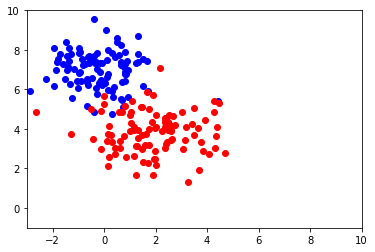

In [2]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
X2=multivariate_normal.rvs(size=100,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-3,10))
plt.ylim((-1,10))

Cuadrados minimos:

In [5]:
t1=np.zeros(X1.shape)
t1[:,0]=np.ones(X1.shape[0])
t2=np.zeros(X2.shape)
t2[:,1]=np.ones(X2.shape[0])

(100, 2)
[[1.01382193 3.87312449]
 [1.50546093 2.33633809]
 [1.88926068 1.67577276]]


In [11]:
X=np.vstack((X1,X2))
Phi=np.hstack((np.ones(X.shape[0]).reshape(-1,1),X))
print(Phi.shape)
T=np.vstack((t1,t2))
print(T.shape)

(200, 3)
(200, 2)


In [18]:
A=np.dot(Phi.T,Phi)
print(A.shape)
B=np.dot(Phi.T,T)
print(B.shape)
W=np.linalg.solve(A,B)
print(W.shape)
print(W)
y1=W[:,0]
y2=W[:,1]

(3, 3)
(3, 2)
(3, 2)
[[-0.49191736  1.49191736]
 [-0.07190231  0.07190231]
 [ 0.19443382 -0.19443382]]


[-0.49191736 -0.07190231  0.19443382]
(100, 100)


(-1.0, 10.0)

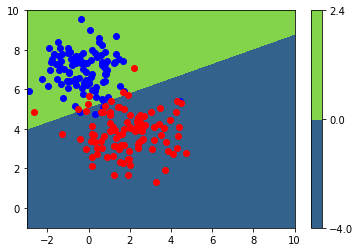

In [49]:
x=np.linspace(-3,10,100)
y=np.linspace(-1,10,100)
Xtoplot,Ytoplot=np.meshgrid(x,y)
print(y1)
print((y1[0]+y1[1]*Xtoplot+y1[2]*Ytoplot).shape)
Zy1=y1[0]+y1[1]*Xtoplot+y1[2]*Ytoplot
#plt.contourf(Xtoplot,Ytoplot,Zy1,levels=[-4.0,0.0,2.4])
#plt.colorbar()
#Zy2=y2[0]+y2[1]*Xtoplot+y2[2]*Ytoplot
#plt.contourf(Xtoplot,Ytoplot,Zy2,alpha=0.6)
Zy=(y1[0]-y2[0])+(y1[1]-y2[1])*Xtoplot+(y1[2]-y2[2])*Ytoplot
plt.contourf(Xtoplot,Ytoplot,Zy,levels=[-4.0,0.0,2.4])
plt.colorbar()
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-3,10))
plt.ylim((-1,10))

Fisher:

In [73]:
mu1=np.mean(X1,axis=0)
mu2=np.mean(X2,axis=0)
Sw1 = np.dot((X1-mu1).T,(X1-mu1))
Sw2 = np.dot((X2-mu2).T,(X2-mu2))
print(Sw1.shape)
print(Sw2.shape)
Sw=Sw1+Sw2
w=np.linalg.solve(Sw,mu1-mu2)
print(w)
aux2=np.linalg.solve(Sw,mu2)
aux1=np.linalg.solve(Sw,mu1)
w0=1/2*np.dot(mu2.T,aux2)-1/2*np.dot(mu1.T,aux1)
print(w0)

(2, 2)
(2, 2)
[-0.0058985   0.01595037]
-0.08137189018088406


(-1.0, 10.0)

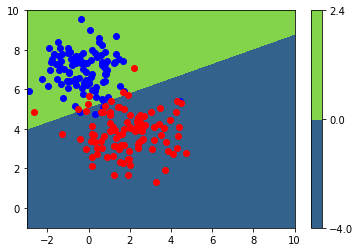

In [74]:
x=np.linspace(-3,10,100)
y=np.linspace(-1,10,100)
Xtoplot,Ytoplot=np.meshgrid(x,y)
Zy=(w0+w[0]*Xtoplot+w[1]*Ytoplot)
plt.contourf(Xtoplot,Ytoplot,Zy,levels=[-4.0,0.0,2.4])
plt.colorbar()
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-3,10))
plt.ylim((-1,10))

**b.** Dataset 2

In [ ]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
aux1=multivariate_normal.rvs(size=90,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
aux2=multivariate_normal.rvs(size=10,mean=[9,0],cov=[[0.2,0.0],[0.0, 0.1]])
X2=np.zeros(X1.shape)
X2[:,0]=np.append(aux1[:,0],aux2[:,0])
X2[:,1]=np.append(aux1[:,1],aux2[:,1])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-5,10))
plt.ylim((-1,10))

**c.** Repita la clasificación en ambos Datasets utilizando la implementación provista en la clase ``sklearn.discriminant_analysis.LinearDiscriminantAnalysis()``

NOTA: Para utilizar el discriminante lineal de Fisher, utilice `` solver=‘eigen’``.

# Ejercicio 2: El Perceptron


**a.** 
Utilice un perceptron para realizar clasificación en el primer dataset del ejercicio anterior y vea si consigue una buena convergencia.

**b.** Repita el ejercicio haciendo uso de la implementación provista en la clase ``sklearn.linear_model.Perceptron()``.

# Ejercicio 3: Regresión Logística

**a.** Aplique clasificación por Regresión Logística a los dos datasets del Ejercicio 1.

*Nota:* Para favorecer la convergencia sin problemas numéricos, utilice como valor inicial de $\vec{w}$ el resultado de alguno de los algoritmos previos.

**b.** Repita el ejercicio haciendo uso de la implementación provista en la clase ``sklearn.linear_model.LogisticRegression()`` 

# Ejercicio 4: Funciones de base

Veamos un caso en el que los datos son en apariencia no linealmente separables. 

In [ ]:
phi=-np.pi+2*np.pi*np.random.rand(100)
L=int(len(phi)/2)
r1=np.random.rand(L)
r2=1.0+2.0*np.random.rand(L)
T=np.zeros(2*L)
X=np.zeros((2*L,2))
for i in range(L):
  X[i,0]=r1[i]*np.cos(phi[i])
  X[i,1]=r1[i]*np.sin(phi[i])
  T[i]=1.0
  X[L+i,0]=r2[i]*np.cos(phi[L+i])
  X[L+i,1]=r2[i]*np.sin(phi[L+i])
plt.scatter(X[:L,0],X[:L,1],color='blue')
plt.scatter(X[L:,0],X[L:,1],color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

**a** Trate de clasificar los datos utilizando Regresion Logistica como en los ejercicios anteriores. Obtenga la matriz de confusion. Que observa?

**b** Haga el cambio de base a coordenadas polares:

$r = \sqrt{x^{2}_{1}+x^{2}_{2}}$

$\phi = \text{Arctan}\left(\frac{x_{2}}{x_{1}}\right)$

Para lo segundo, utilize la funcion `np.arctan2`. Grafique y entrene un Regresor Logistico en esta nueva base. Que encuentrea?

**c** Grafique la frontera de decision en la base original.

# Ejercicio 5: Dataset de Iris (Multiclase):

A continuación utilizaremos el famoso dataset de Iris, tomado del paper de Fisher del 1936 en donde lo utilizó por primera vez para ejmemplificar el uso del análisis determinante lineal. 

El dataset consiste de 150 muestras de 3 tipos distintos de flor Iris, 50 muestras de cada una. Cada muestra consiste de las medidas (en cm) del ancho y largo del pétalo y sépalo de una flor. 

Su trabajo es entrenar un modelo que correctamente clasifique de qué tipo es una flor Iris, dadas sus medidas de ancho y largo de sus pétalos y sétalos. Para esto, explore y juegue con los modelos vistos hasta ahora. Cuando termine, de una estimación objetiva de la ``accuracy`` esperada de su modelo. 

*Bonus: intente identificar si entre las tres clases alguna o todas son o no linealmente separables.*

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target